In [3]:
import cv2 as cv
import numpy as np

In [2]:
img = cv.imread('Photos and videos/Resources/Photos/park.jpg')
cv.imshow('Original', img)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()

In [3]:
b,g,r = cv.split(img)
cv.imshow('Blue Channel', b)
cv.imshow('Green Channel', g)
cv.imshow('Red Channel', r)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()
    

In [4]:
print('Blue channel shape:', b.shape)
print('Green channel shape:', g.shape)
print('Red channel shape:', r.shape)

Blue channel shape: (427, 640)
Green channel shape: (427, 640)
Red channel shape: (427, 640)


Creating a blank image and then merge the color channels into the blank image.

In [5]:
blank = np.zeros(img.shape[:2], dtype='uint8')

In [ ]:
blue = cv.merge([b, blank, blank])
green = cv.merge([blank, g, blank])
red = cv.merge([blank, blank, r])
cv.imshow('Blue', blue)
cv.imshow('Green', green)
cv.imshow('Red', red)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()

Blur techniques

In [9]:
average = cv.blur(img, (7,3))
cv.imshow('Average Blur', average)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()


In [ ]:
gaussian = cv.GaussianBlur(img, (7,3), 0)
cv.imshow('Gaussian Blur', gaussian)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()
    #guassian blur has less blur effect than average blur on passing the same kernel size because it uses a Gaussian function to calculate the weights of the pixels in the kernel. 
    # whereas average blur simply takes the average of all pixels in the kernel without considering their spatial distribution. 

In [ ]:
bilateral = cv.bilateralFilter(img, 5, 75, 150)
cv.imshow('Bilateral Filter', bilateral)
cv.imshow('original', img)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()
    #bilateral filter is better at preserving edges while reducing noise compared to Gaussian and average blurs.
    # It does this by considering both the spatial distance and the intensity difference of pixels, allowing it to smooth out noise while keeping edges sharp.
    # The bilateral filter is particularly effective for images with varying levels of detail and texture, making it a preferred choice for tasks like image denoising and smoothing while maintaining important features.
    # This has the parameters:
    # - d: Diameter of the pixel neighborhood used during filtering.
    # - sigmaColor: Filter sigma in color space. A larger value means that colors farther apart will be mixed together, resulting in larger areas of semi-equal color.
    # - sigmaSpace: Filter sigma in coordinate space. A larger value means that pixels farther apart will influence each other as long as their colors are close enough.
    

Masking 

In [4]:
img2 =cv.imread('Photos and videos/Resources/Photos/cats.jpg')
cv.imshow('Original Cats', img2)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()
    

In [25]:
blank = np.zeros(img2.shape[:2], dtype='uint8')
mask = cv.circle(blank, (img2.shape[1]//2, img2.shape[0]//2), 100, 255, -1)
cv.imshow('Mask', mask)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()
#making means to focus on certain part of the image
#

In [26]:
masked = cv.bitwise_and(img2, img2, mask=mask)
cv.imshow('Masked Image', masked)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()
#parameters for bitwise_and:
# - src1: First input array.
# - src2: Second input array Using the same image means the function will keep pixels unchanged wherever the mask is non-zero.
# - dst: Output array that has the same size and type as the input arrays.

Computing Histograms

In [27]:
import matplotlib.pyplot as plt

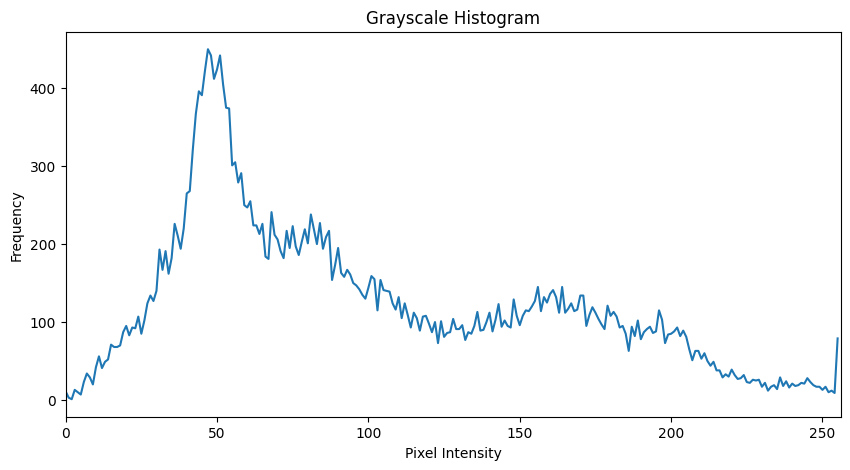

In [39]:
gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
gray_hist = cv.calcHist([img2], [2], mask, [256], [0, 256])

plt.figure(figsize=(10, 5))
plt.title('Grayscale Histogram')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.plot(gray_hist)
plt.xlim([0, 256])
plt.show()

cv.waitKey(0)
cv.destroyAllWindows()


Thresholding and its types

In [ ]:
#Simple thresholding
gray = cv.cvtColor(img2, cv.COLOR_BGR2GRAY)
threshold, thresh = cv.threshold(gray, 150, 255, cv.THRESH_OTSU)
threshold, thresh2 = cv.threshold(gray, 150, 255, cv.THRESH_BINARY)
cv.imshow('Simple Thresholding', thresh)
cv.imshow('Simple Thresholding2', thresh2)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()


In [6]:
#adaptive thresholding
adaptive_thresh = cv.adaptiveThreshold(gray, 255, cv.ADAPTIVE_THRESH_GAUSSIAN_C, cv.THRESH_BINARY, 11, 2)
cv.imshow('Adaptive Thresholding', adaptive_thresh)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows( )
#adaptive thresholding is better than simple thresholding because it calculates the threshold for smaller regions of the image, allowing it to adapt to varying lighting conditions and textures.
# This makes it more effective for images with uneven illumination or complex backgrounds, where a global threshold might fail to produce satisfactory results.
# It uses the mean or weighted mean of the neighborhood pixels to determine the threshold, which helps in preserving details in different areas of the image.
# The parameters for adaptive thresholding are:
# - src: Input image (grayscale).
# - maxValue: Maximum value to use with the THRESH_BINARY and THRESH_BINARY_INV thresholding types.
# - adaptiveMethod: Adaptive method to use, either ADAPTIVE_THRESH_MEAN_C or ADAPTIVE_THRESH_GAUSSIAN_C.
# - thresholdType: Type of thresholding to apply, such as THRESH_BINARY or THRESH_BINARY_INV.
# - blockSize: Size of the neighborhood area used to calculate the threshold value.
# - C: Constant subtracted from the mean or weighted mean to fine-tune the threshold value. can be zero or positive, depending on the desired effect.


In [ ]:
lap = cv.Laplacian(img2, cv.CV_64F)
lap = cv.convertScaleAbs(lap)  # Convert to absolute values for display
cv.imshow('Laplacian', lap)
if cv.waitKey(0) & 0xFF == ord('q'):
    cv.destroyAllWindows()